In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [10]:
data = pd.read_csv("polarization_stability_rantoul_20221122.csv",delimiter=",",skiprows=14)

In [55]:
data.keys()

Index(['Samples ', 'Date (MM/dd/yyyy) ', 'Time of day (hh:mm:ss) ',
       'Power (W)', 'Power (W).1', 'Power (W).2', 'Power (W).3', 'Unnamed: 7'],
      dtype='object')

In [14]:
ratio_back = data['Power (W)']/data['Power (W).1']

In [15]:
ratio_sent = data['Power (W).3']/data['Power (W).2']

In [26]:
dates = [datetime.datetime(d) for d in data['Time of day (hh:mm:ss) ']]

TypeError: an integer is required (got type str)

In [57]:
datetime.datetime.strptime(data['Date (MM/dd/yyyy) '][1][1:]+data['Time of day (hh:mm:ss) '][1],'%m/%d/%Y %H:%M:%S.%f')

datetime.datetime(2022, 11, 22, 15, 47, 23, 656000)

In [58]:
times = [datetime.datetime.strptime(data['Date (MM/dd/yyyy) '][i][1:]+d,'%m/%d/%Y %H:%M:%S.%f') for i,d in enumerate(data['Time of day (hh:mm:ss) '])]

In [76]:
temp_20222211 = [54,42,37,37,36,35,34,32,33,31,31,32,29,30,28,25,33,44,49,55,59,60,61,60,56]
temp_times = [times[3600*i] for i in range(25)]

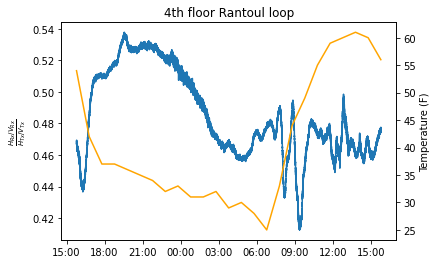

In [80]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(times,ratio_back/ratio_sent)
ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{H_{Rx}/V_{Rx}}{H_{Tx}/V_{Tx}}$")
ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("4th floor Rantoul loop")
plt.savefig('rantoul_4th_20222211.png')

In [83]:
deg_sent = np.degrees(np.arctan(ratio_sent))
deg_back = np.degrees(np.arctan(ratio_back))

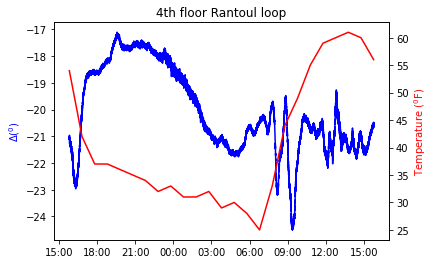

In [88]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(times,deg_back-deg_sent,color='blue')
ax2.plot(temp_times,temp_20222211,color="red")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\Delta(^0)$",color='blue')
ax2.set_ylabel(r"Temperature ($^0$F)",color='red')
plt.xlabel("Time")
plt.title("4th floor Rantoul loop")
plt.savefig('rantoul_4th_20222211.png')

In [40]:
data['Time of day (hh:mm:ss) '][0]

' 15:47:22.328'

In [85]:
max(deg_back-deg_sent)-min(deg_back-deg_sent)

7.39628671753524

In [92]:
data_5 = pd.read_csv("polarization_stability_rantoul_20222911_5th_floor.csv",delimiter=";",skiprows=14)

In [96]:
times_5 = [datetime.datetime.strptime(data_5['Date (MM/dd/yyyy) '][i][1:]+d,'%m/%d/%Y %H:%M:%S') for i,d in enumerate(data_5['Time of day (hh:mm:ss) '])]

In [105]:
temp_20222911 = [57,58,48,42,36,34,31,29,27,27,26,25,24,26,27,29,30,31,31,31,31,30,29,28,28]
temp_times_5 = [times_5[3600*i] for i in range(24)]
temp_times_5.append(datetime.datetime.strptime("11/30/2022 18:53:08",'%m/%d/%Y %H:%M:%S'))

In [100]:
ratio_back_5 = data_5['Power (W).2']/data_5['Power (W).1']

In [101]:
ratio_sent_5 = data_5['Power (W).3']/data_5['Power (W)']

In [69]:
times_5 = [datetime.datetime.strptime(data_5['Date (MM/dd/yyyy) '][i][1:]+d,'%m/%d/%Y %H:%M:%S') for i,d in enumerate(data_5['Time of day (hh:mm:ss) '])]

In [103]:
deg_sent_5 = np.degrees(np.arctan(ratio_sent_5))
deg_back_5 = np.degrees(np.arctan(ratio_back_5))

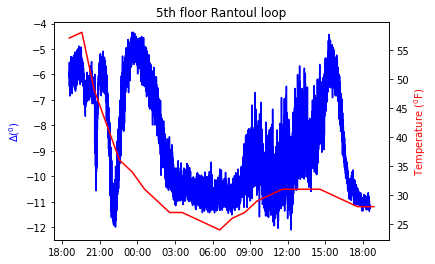

In [107]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(times_5,deg_back_5-deg_sent_5,color='blue')
ax2.plot(temp_times_5,temp_20222911,color="red")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\Delta(^0)$",color='blue')
ax2.set_ylabel(r"Temperature ($^0$F)",color='red')
plt.xlabel("Time")
plt.title("5th floor Rantoul loop")
plt.savefig('rantoul_5th_20222911.png')

In [108]:
max(deg_back_5-deg_sent_5)-min(deg_back_5-deg_sent_5)

7.764354213904809